In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt

C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\

C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site

In [2]:
import glob
import tensorflow as tf

In [3]:
tflib.init_tf()


In [4]:
model_path = "./results/vm/landscapes-no-cond/network-snapshot-006126.pkl" 
with open(model_path, "rb") as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, 1, clipping_threshold=2.0, tiled_dlatent=False,
                      model_res=512, randomize_noise=False)
    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, latent_vector.shape[0], 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    #avg_latents.append(generator.get_dlatent_avg())
    return img.resize((256, 256))

In [6]:
filenames = sorted(glob.glob(("latent_representations\\landscapes\\*")))


In [7]:
avg_latents = []
for file in filenames:
    latent = np.load(file)
    plt.imshow(generate_image(latent))
    plt.show()

PermissionError: [Errno 13] Permission denied: 'latent_representations\\landscapes\\10'

In [5]:
rnd = np.random.RandomState(0)
random_latents = rnd.randn(10, 16,512)

In [6]:
c = np.tile(np.eye(4)[1],(10,1))
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)

In [25]:
qlatents = np.random.normal(size=(1, 512))
dlatents = Gs_network.components.mapping.run(qlatents,
                                             None, 
                                             minibatch_size=1, 
                                             randomize_noise=False, 
                                             structure='fixed')
images = Gs_network.components.synthesis.run(dlatents, 
                                             minibatch_size=1, 
                                             randomize_noise=False, 
                                             output_transform=fmt,
                                             structure='fixed')
images2 = Gs_network.run(qlatents,None, randomize_noise=False, output_transform=fmt,
                        truncation_psi=None, truncation_cutoff=None, dlatent_avg_beta=None,
                        style_mixing_prob=None)


In [28]:
Gs_network

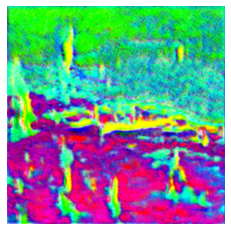

In [36]:
for im in images:
    img = PIL.Image.fromarray(im, 'RGB')
    plt.imshow(img,interpolation='bicubic')
    plt.axis('off')
    plt.show()

In [ ]:
for latent in dlatents:
    plt.imshow(generate_image(latent))
    plt.show()

In [ ]:
for latent in random_latents:
    plt.imshow(generate_image(latent))
    plt.show()

In [30]:
def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

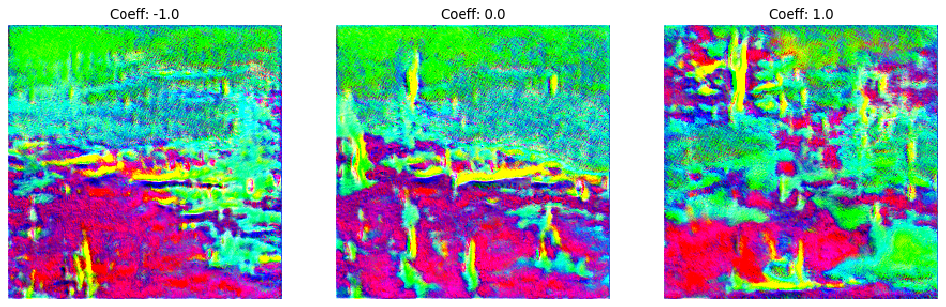

In [35]:
move_and_show(dlatents[0],rnd.randn(16,512), [-1,0,1])

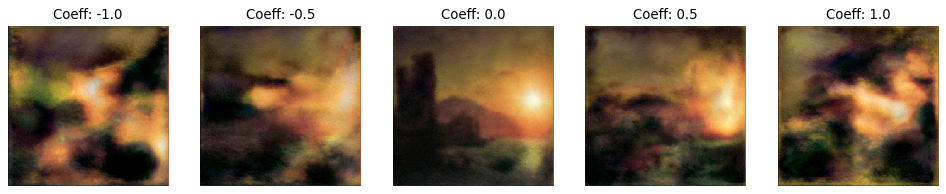

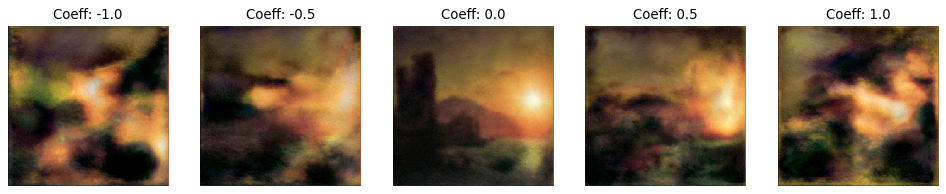

In [12]:
move_and_show(np.load(filenames[1]), rnd.randn(16,512), [-1,-0.5,0,0.5,1])

In [58]:
lakeside_direction = pickle.load(open("lakeside_direction1000.p", 'rb'))
geyser_direction = pickle.load(open("geyser_direction1000.p", 'rb'))
cliff_direction = pickle.load(open("cliff_direction1000.p", 'rb'))
valley_direction = pickle.load(open("valley_direction1000.p", 'rb'))
volcano_direction = pickle.load(open("volcano_direction1000.p", 'rb'))


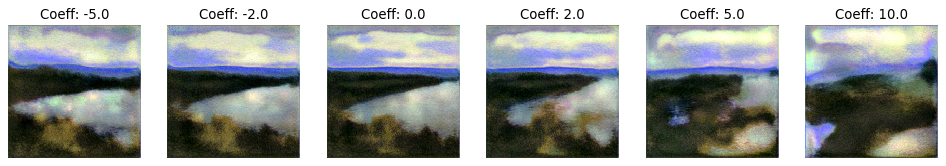

In [69]:
move_and_show(np.load(filenames[0]), volcano_direction, [-5,-2,0,2,5,10])